In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_absolute_percentage_error,r2_score


In [11]:
df=pd.read_csv("cleaned_train.csv")
df.head()

,Unnamed: 0,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
0,0,6,1710,2,2,548,2,856,856,2,2,1,8,2003,2003,196.0,208500
1,1,5,1262,2,3,460,2,1262,1262,3,2,1,6,1976,1976,0.0,181500
2,2,6,1786,2,2,608,2,920,920,2,2,1,6,2001,2002,162.0,223500
3,3,6,1717,3,3,642,3,756,961,2,1,2,7,1915,1970,0.0,140000
4,4,7,2198,3,2,836,2,1145,1145,2,2,1,9,2000,2000,350.0,250000


In [12]:
# Assign X,y Values 
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split data as training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [13]:


# Define the parameter values for GridSearchCV
param_grid = {'n_estimators': [100, 200, 300], 'min_samples_split': [2, 5, 10]}

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', refit=True, verbose=2)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and print
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Build the Randomf forest regression model with the best fit parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)



Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END ..............min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END ..............min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END ..............min_samples_split=2, n_es

RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=42)

In [14]:
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_log_error(y_test,y_pred)
mae = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 0.12992354550982085
Mean Squared Error: 0.03240619654872938
R-squared: 0.8144646198414417


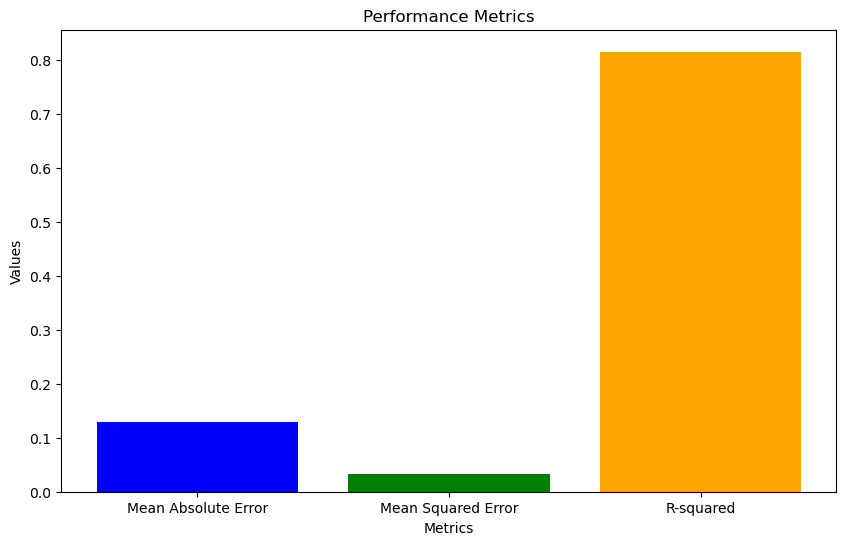

In [12]:
import matplotlib.pyplot as plt
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
values = [mae, mse, r2]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.show()
